In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Callable
import seaborn as sns;

file_path = "J:/DSA5206 Project/data/Temp_and_rain.csv"
df = pd.read_csv(file_path)
print(df.head())

       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


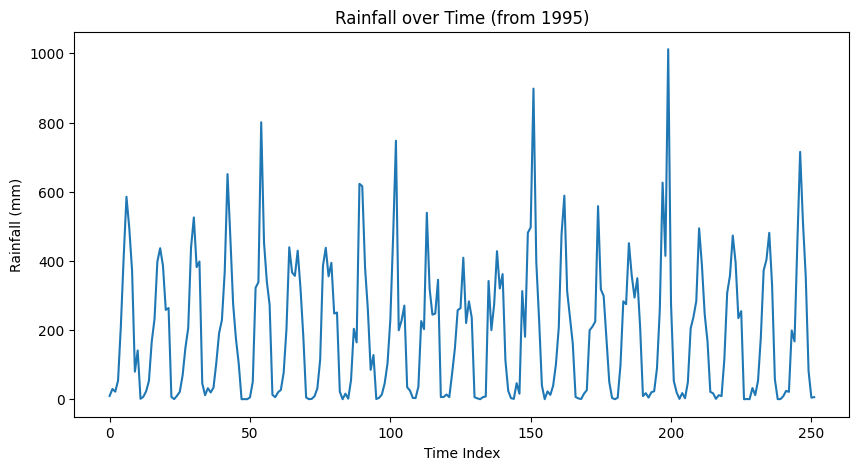

In [3]:
filter_df = df[df['Year'] >= 1995]
x = range(0, len(filter_df["rain"]))
y = np.array(filter_df["rain"])

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Rainfall over Time (from 1995)')
plt.xlabel('Time Index')
plt.ylabel('Rainfall (mm)')
plt.show()

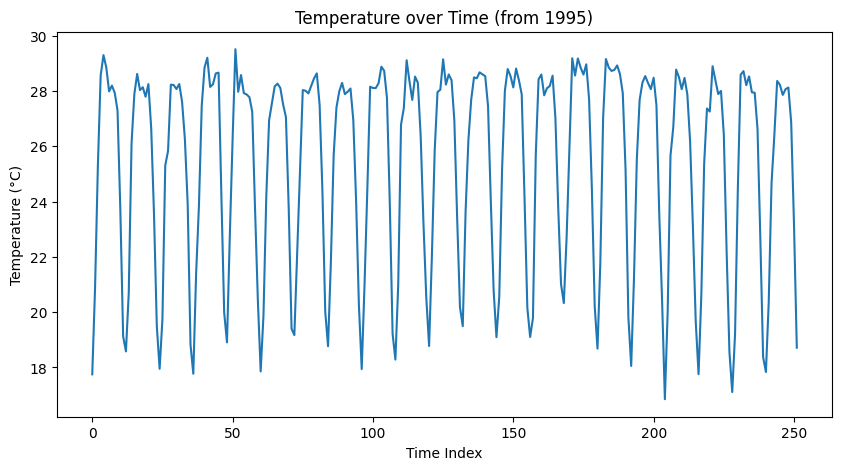

In [4]:
filter_df = df[df['Year'] >= 1995]
x = range(0, len(filter_df["tem"]))
y = np.array(filter_df["tem"])

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Temperature over Time (from 1995)')
plt.xlabel('Time Index')
plt.ylabel('Temperature (°C)')
plt.show()

**Non-linear Dimension Reduction Using Fourier Basis**

In [5]:
def fourier_basis(x: np.ndarray, num_components: int) -> np.ndarray:
    num_samples = len(x)
    basis = np.zeros((num_samples, num_components))
    period = 12

    for i in range(num_components):
        k = (i + 1) // 2
        freq = (2 * np.pi * k) / period  
        if i % 2 == 0:
            basis[:, i] = np.cos(freq * x)  
        else:
            basis[:, i] = np.sin(freq * x)  

    return basis

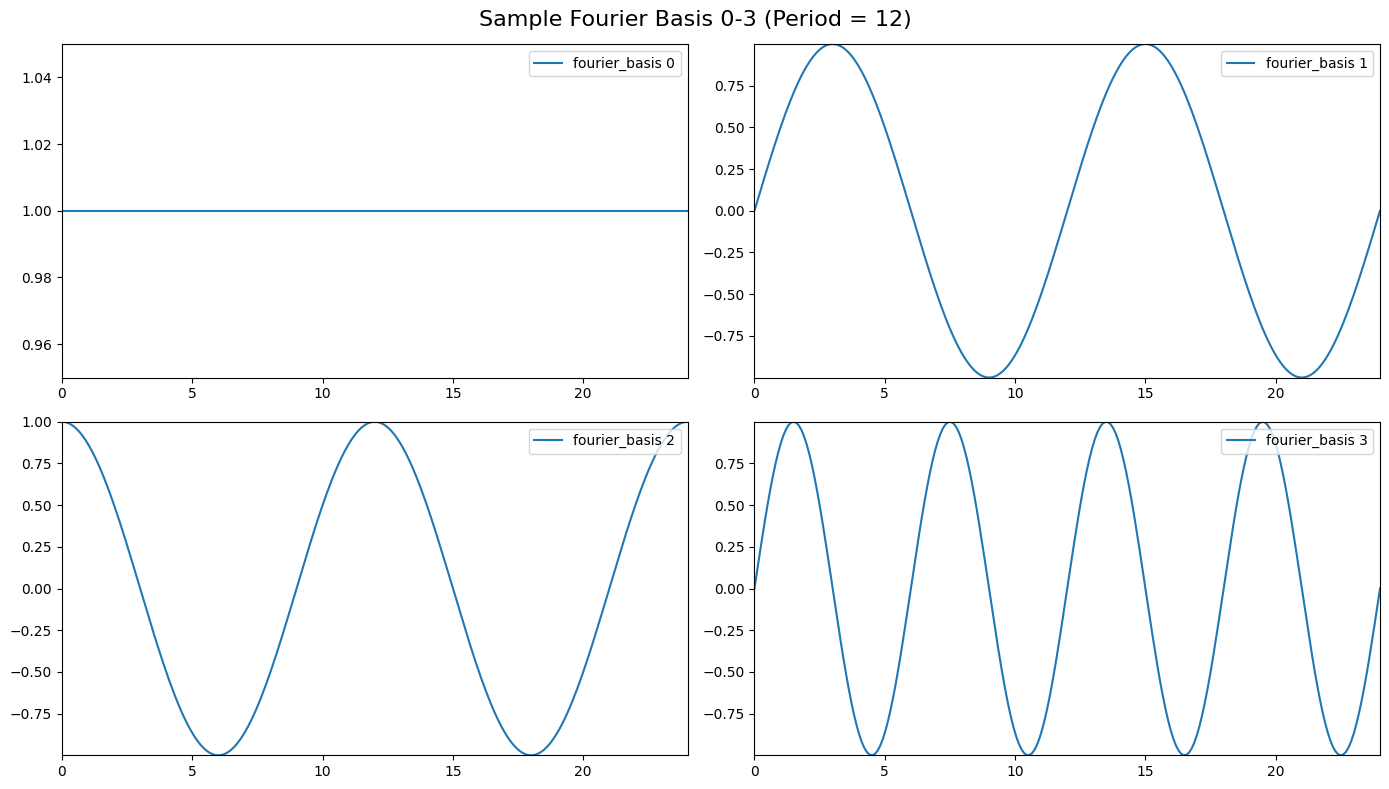

In [6]:
num_components = 4
x_values_smooth = np.linspace(0, 24, 240)  # 240 points for smoothness
fourier_bases_smooth = fourier_basis(x_values_smooth, num_components)

# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs = axs.flatten()
# Plot each of the first 4 basis functions in separate subplots with the smoother x values
for i in range(num_components):
    axs[i].plot(x_values_smooth, fourier_bases_smooth[:, i], label=f'fourier_basis {i}')
    axs[i].legend(loc='upper right')
    axs[i].set_xlim([x_values_smooth[0], x_values_smooth[-1]])  
    axs[i].margins(x=0, y=0)  

fig.suptitle('Sample Fourier Basis 0-3 (Period = 12)', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

def fit(y: np.ndarray, x: np.ndarray, basis: callable, num_components: int) -> tuple:
    scores, predictions = [], []

    # Iterate over each number of components
    for N in range(1, num_components + 1):
        basis_x = basis(x, N)  # Generate the basis features
        reg = LinearRegression().fit(basis_x, y)  # Fit the coefficients
        score = reg.score(basis_x, y)  # Calculate the R^2 score
        prediction = reg.predict(basis_x)  # Make predictions
        scores.append(score)
        predictions.append(prediction)
    
    return scores, predictions

In [8]:
y_data = np.array(filter_df['tem'])  
x_data = np.array(range(len(filter_df)))

num_components_to_fit = 10 
scores, predictions = fit(y_data, x_data, fourier_basis, num_components_to_fit)

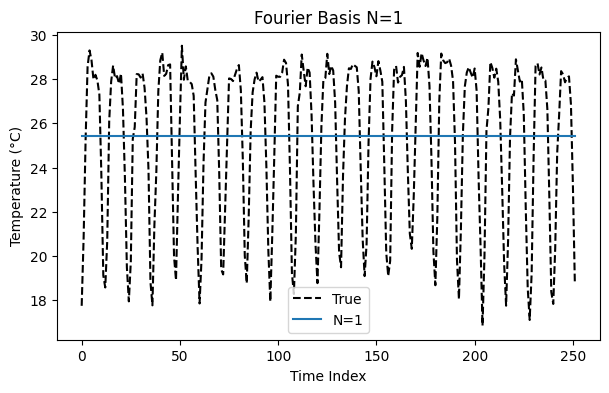

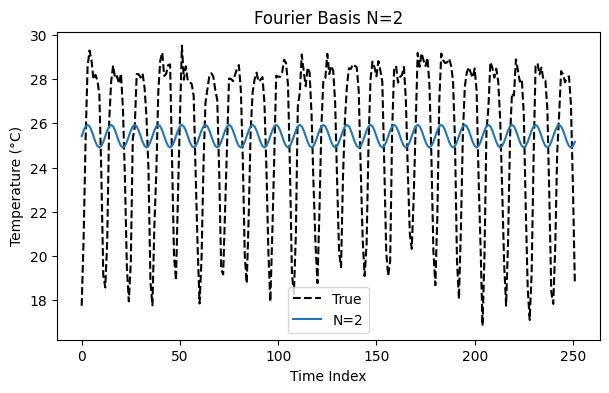

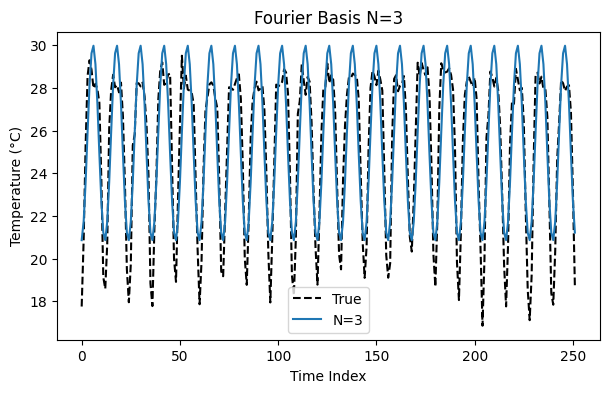

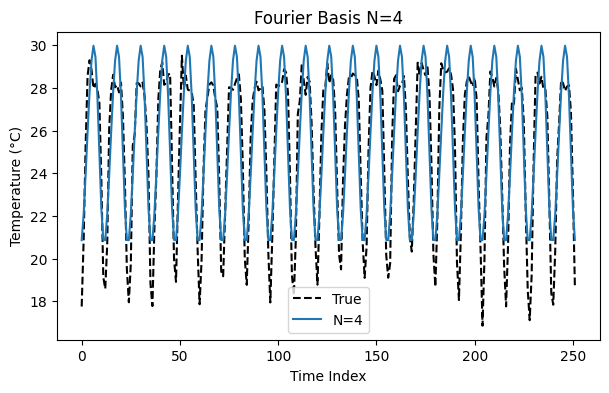

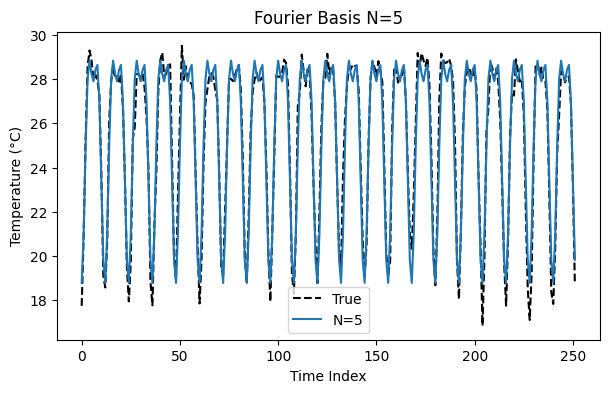

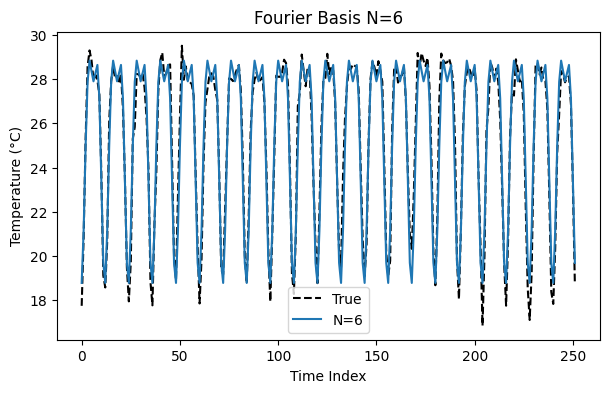

In [9]:
# Plotting the true values and predictions for Fourier basis 1-6 in separate plots
for i in range(6):
    plt.figure(figsize=(7, 4))
    plt.plot(x_data, y_data, 'k--', label='True')
    plt.plot(x_data, predictions[i], label=f'N={i+1}')
    plt.legend()
    plt.title(f'Fourier Basis N={i+1}')
    plt.xlabel('Time Index')
    plt.ylabel('Temperature (°C)')
    plt.show()

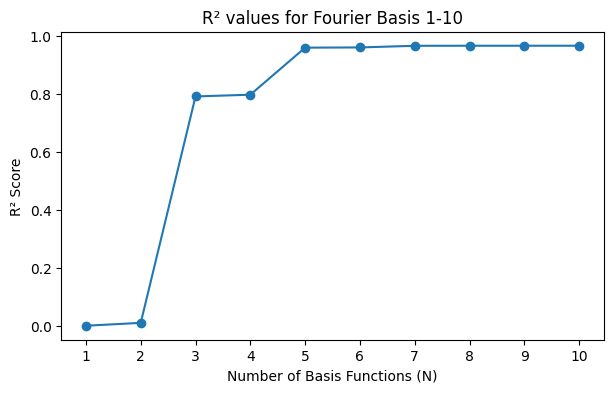

In [10]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), scores[:10], marker='o')
plt.title('R² values for Fourier Basis 1-10')
plt.xlabel('Number of Basis Functions (N)')
plt.ylabel('R² Score')
plt.xticks(range(1, 11))
plt.show()

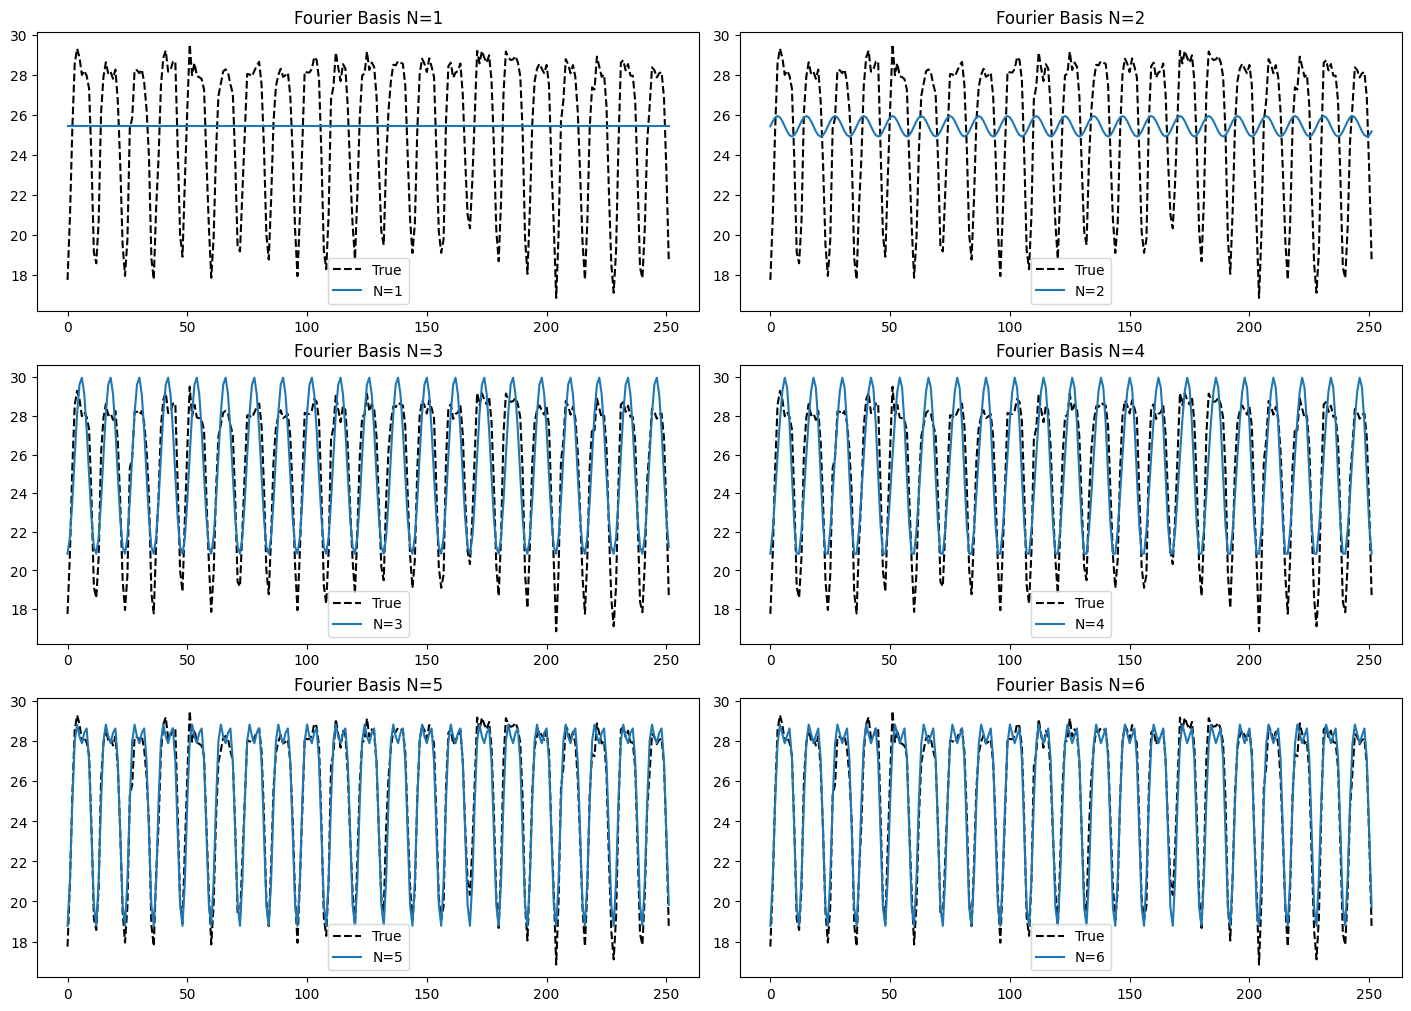

In [11]:
# Set up the figure and subplots for true values and predictions with 1, 2, 3, 4 Fourier basis
fig, axs = plt.subplots(3, 2, figsize=(14, 10), constrained_layout=True)

# Iterate over the first 6 components and plot the true values and predictions in individual subplots
for i in range(6):
    row, col = i // 2, i % 2
    axs[row, col].plot(x_data, y_data, 'k--', label='True')
    axs[row, col].plot(x_data, predictions[i], label=f'N={i+1}')
    axs[row, col].legend()
    axs[row, col].set_title(f'Fourier Basis N={i+1}')

plt.show()

**Non-linear Dimension Reduction Using Legendre Basis**

In [12]:
def legendre_basis(x: np.ndarray, num_components: int) -> np.ndarray:
    x_scaled = 2 * (x / 12) - 1

    num_samples = len(x)
    basis = np.zeros((num_samples, num_components))

    for i in range(num_components):

        coefficients = [0] * (i + 1)
        coefficients[i] = 1
        basis[:, i] = np.polynomial.legendre.legval(x_scaled, coefficients)

    return basis

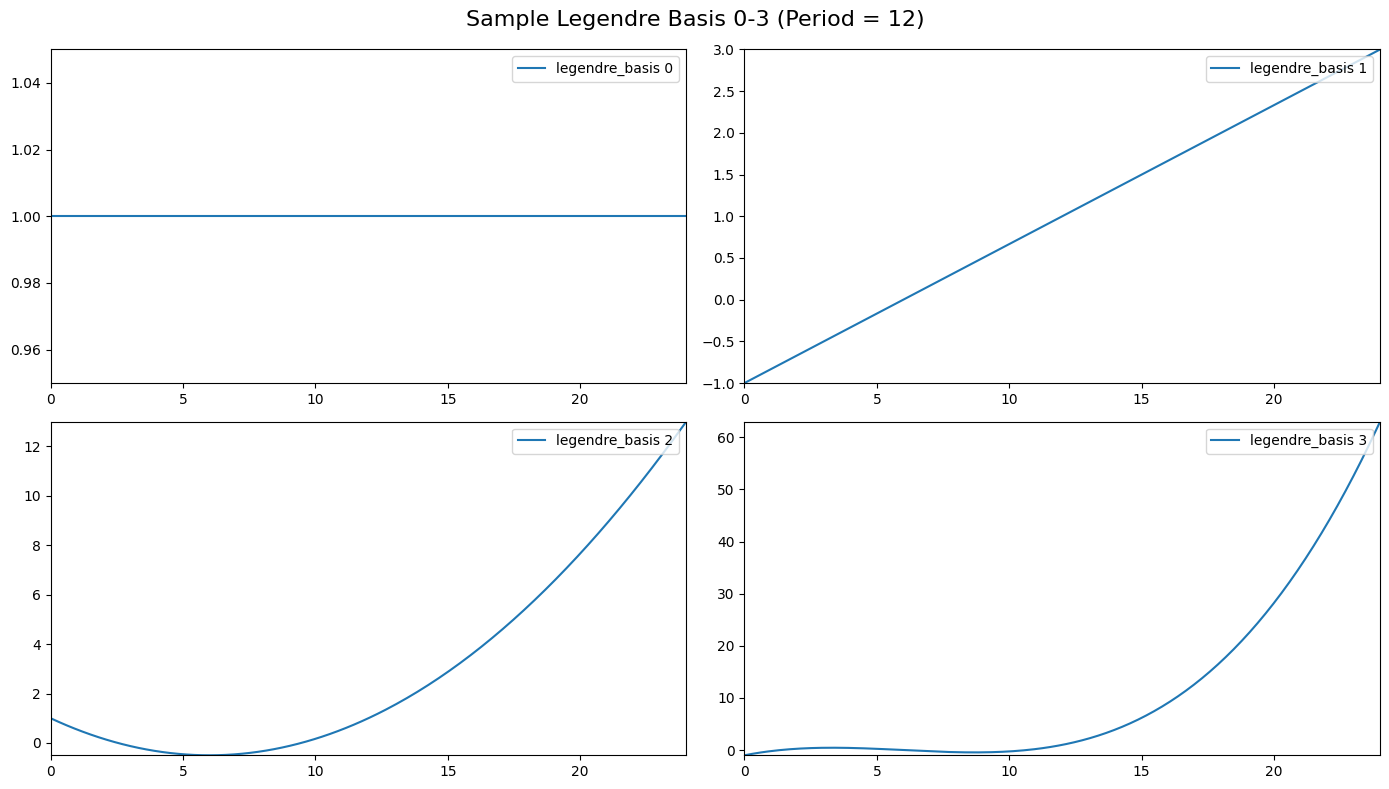

In [20]:
legendre_bases_smooth = legendre_basis(x_values_smooth, num_components)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs = axs.flatten()
# Plot each of the first 4 basis functions in separate subplots with the smoother x values
for i in range(num_components):
    axs[i].plot(x_values_smooth, legendre_bases_smooth[:, i], label=f'legendre_basis {i}')
    axs[i].legend(loc='upper right')
    axs[i].set_xlim([x_values_smooth[0], x_values_smooth[-1]])  
    axs[i].margins(x=0, y=0)  

fig.suptitle('Sample Legendre Basis 0-3 (Period = 12)', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
scores, predictions = fit(y_data, x_data, legendre_basis, num_components_to_fit)

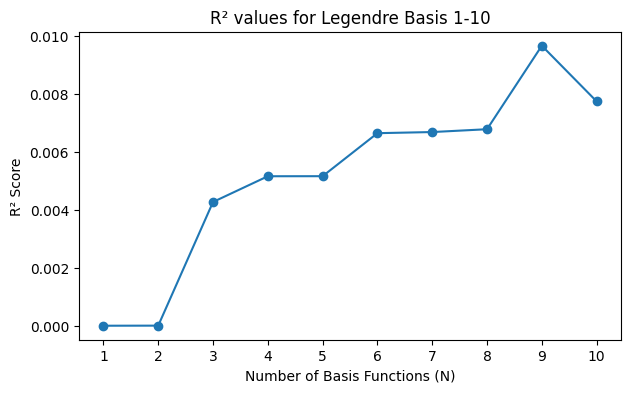

In [17]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), scores[:10], marker='o')
plt.title('R² values for Legendre Basis 1-10')
plt.xlabel('Number of Basis Functions (N)')
plt.ylabel('R² Score')
plt.xticks(range(1, 11))
plt.show()

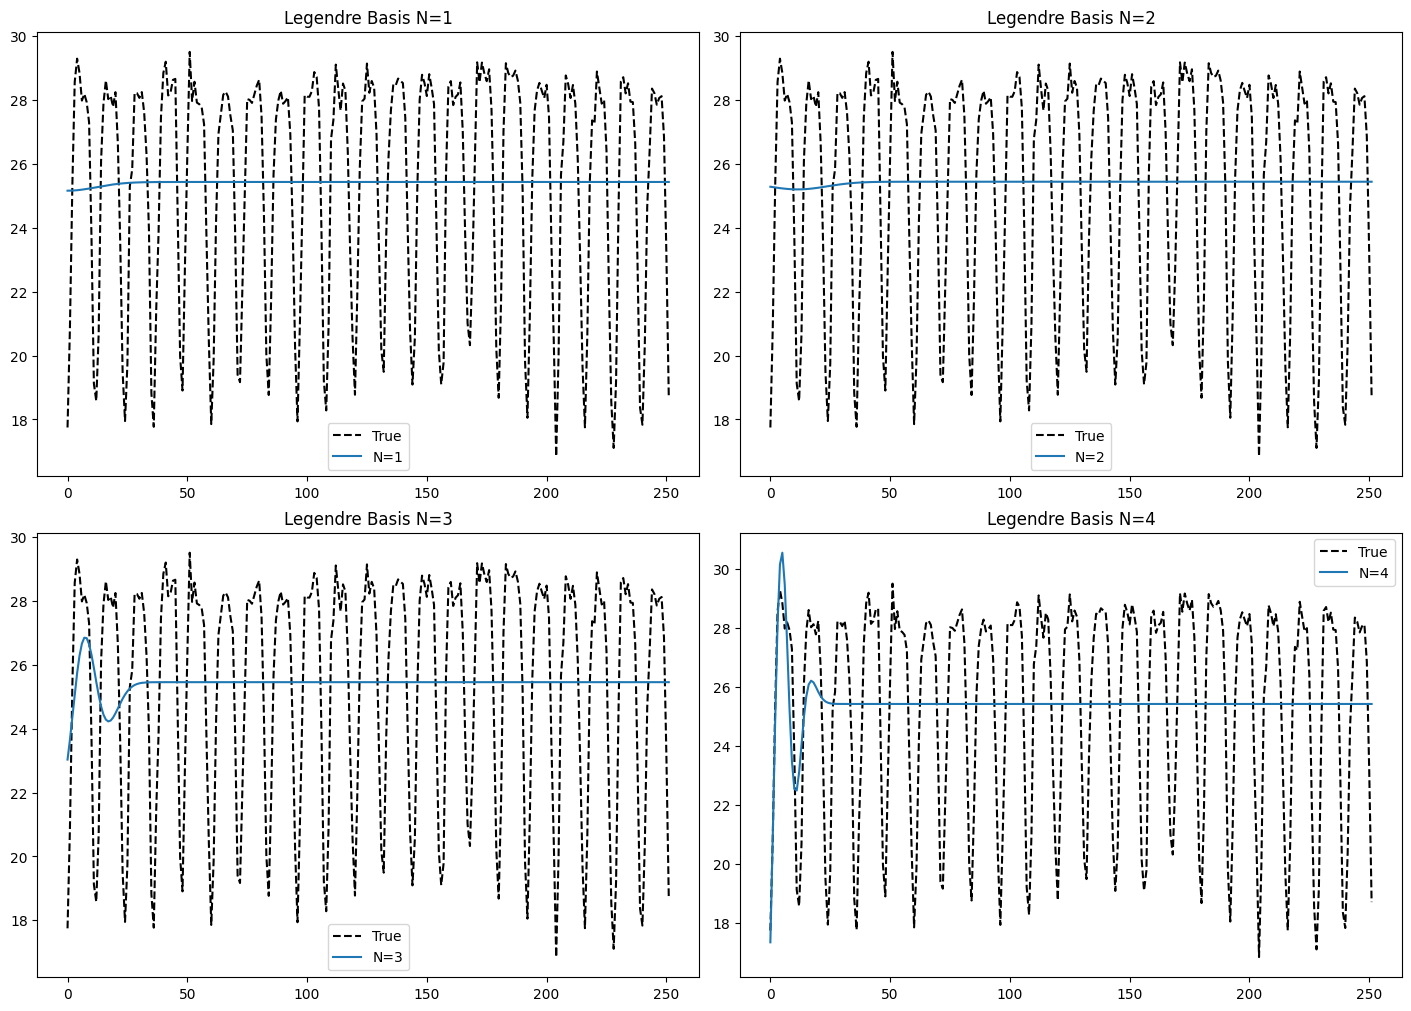

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterate over the first 6 components and plot the true values and predictions in individual subplots
for i in range(4):
    row, col = i // 2, i % 2
    axs[row, col].plot(x_data, y_data, 'k--', label='True')
    axs[row, col].plot(x_data, predictions[i], label=f'N={i+1}')
    axs[row, col].legend()
    axs[row, col].set_title(f'Legendre Basis N={i+1}')

plt.show()

**Non-linear Dimension Reduction Using Radius Basis**

In [21]:
def radial_basis(x: np.ndarray, num_components: int) -> np.ndarray:

    num_samples = len(x)
    basis = np.zeros((num_samples, num_components))
    # Place centers evenly across the range 0 to 12
    centers = np.linspace(0, 12, num_components)

    width = (12 / (num_components - 1)) if num_components > 1 else 12

    for i, c in enumerate(centers):
        # Calculate the radial basis function for the current component
        basis[:, i] = np.exp(-(x - c) ** 2 / (2 * width ** 2))  # Evaluate the basis function

    return basis

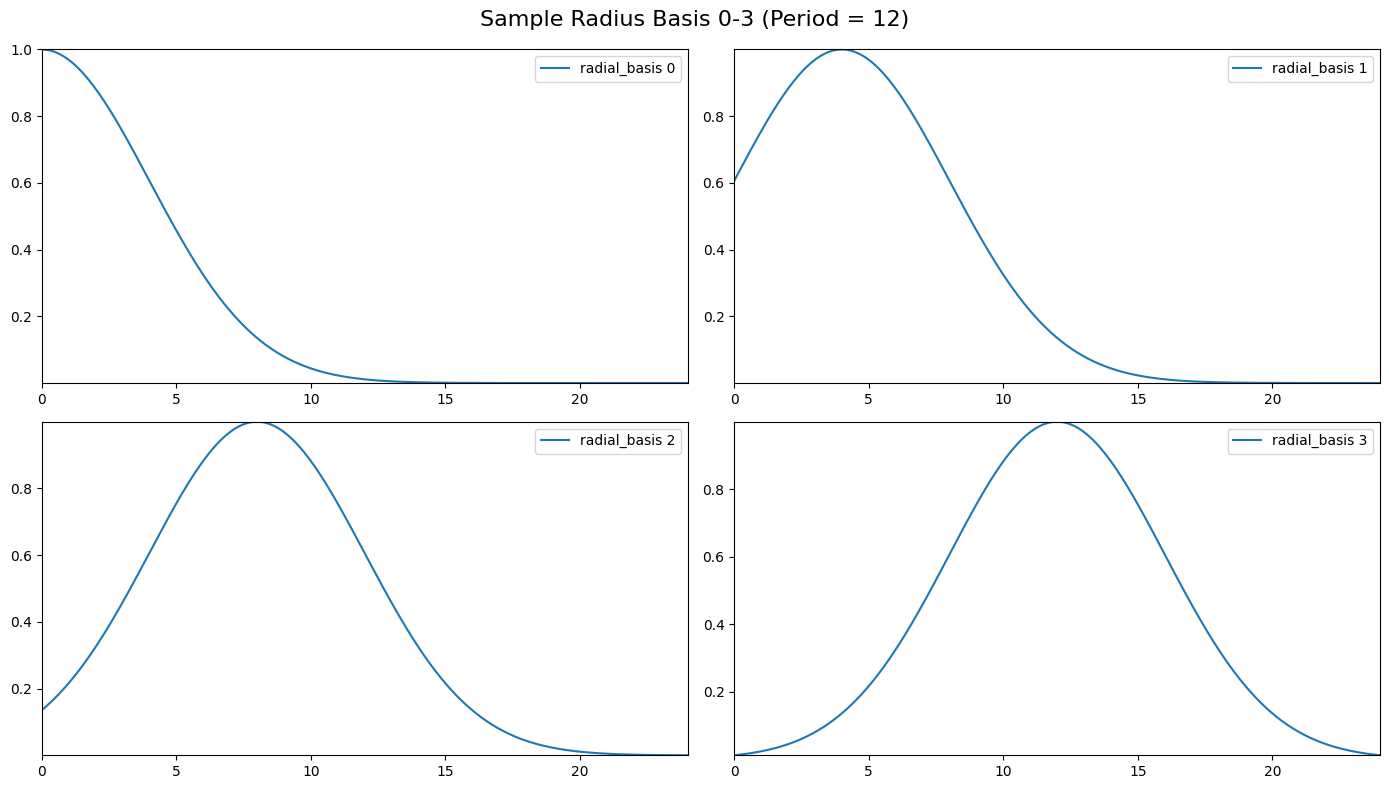

In [22]:
radial_basis_smooth = radial_basis(x_values_smooth, num_components)

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs = axs.flatten()
# Plot each of the first 4 basis functions in separate subplots with the smoother x values
for i in range(num_components):
    axs[i].plot(x_values_smooth, radial_basis_smooth[:, i], label=f'radial_basis {i}')
    axs[i].legend(loc='upper right')
    axs[i].set_xlim([x_values_smooth[0], x_values_smooth[-1]])  
    axs[i].margins(x=0, y=0)  

fig.suptitle('Sample Radius Basis 0-3 (Period = 12)', fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
scores, predictions = fit(y_data, x_data, radial_basis, num_components_to_fit)

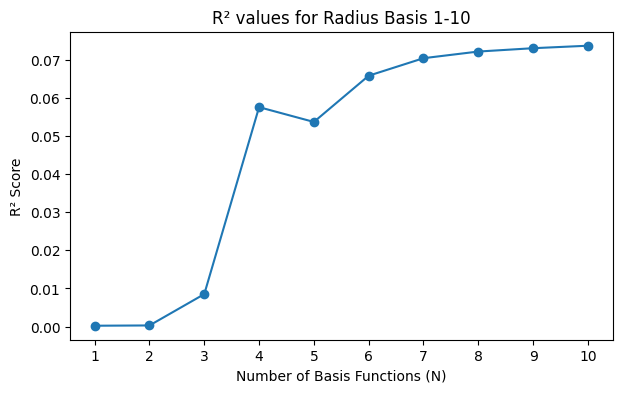

In [24]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), scores[:10], marker='o')
plt.title('R² values for Radius Basis 1-10')
plt.xlabel('Number of Basis Functions (N)')
plt.ylabel('R² Score')
plt.xticks(range(1, 11))
plt.show()

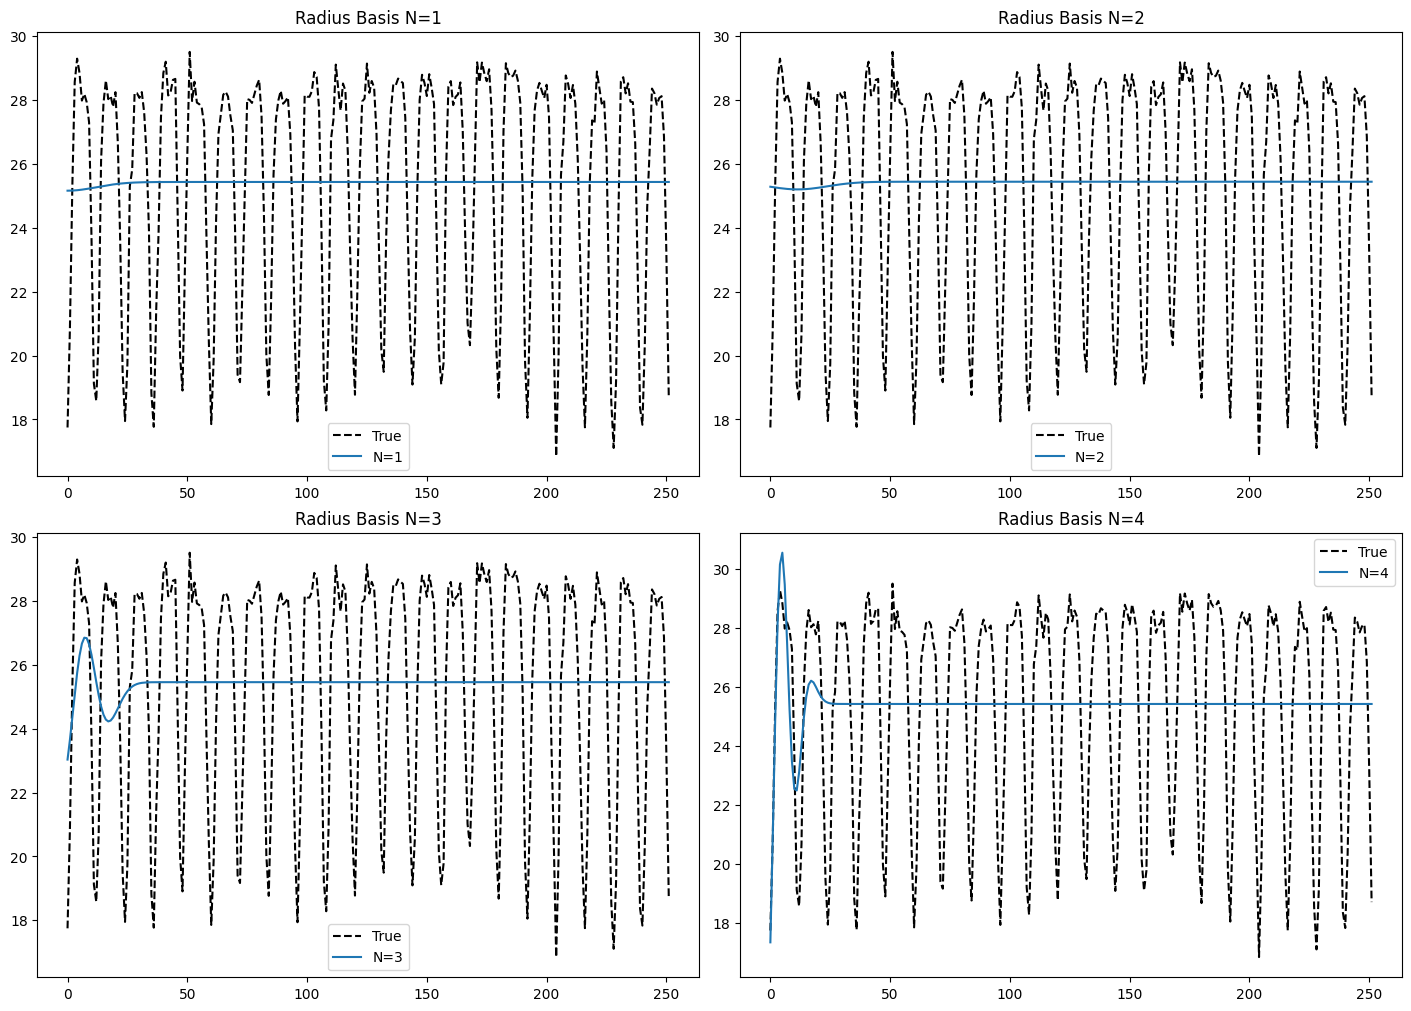

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterate over the first 6 components and plot the true values and predictions in individual subplots
for i in range(4):
    row, col = i // 2, i % 2
    axs[row, col].plot(x_data, y_data, 'k--', label='True')
    axs[row, col].plot(x_data, predictions[i], label=f'N={i+1}')
    axs[row, col].legend()
    axs[row, col].set_title(f'Radius Basis N={i+1}')

plt.show()